In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colors import Normalize, ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
# Get our banned books + districts
df_school_yr_1 = pd.read_csv("PEN_July_1_2021_June_30_2022.csv", sep=",")
df_school_yr_2 = pd.read_csv("PEN_July_1_2022_December_31_2022.csv", sep=",")
books = df_school_yr_1.append(df_school_yr_2)

<ipython-input-6-af22ba5b947b>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  books = df_school_yr_1.append(df_school_yr_2)


In [7]:
books

,Author,Title,Type of Ban,Secondary Author(s),Illustrator(s),Translator(s),State,District,Date of Challenge/Removal,Origin of Challenge,Series Name,Ban Status
0,"Àbíké-Íyímídé, Faridah",Ace of Spades,Banned in Libraries and Classrooms,NaN,NaN,NaN,Florida,Indian River County School District,Nov-21,Administrator,NaN,NaN
1,"Acevedo, Elizabeth",Clap When You Land,Banned in Classrooms,NaN,NaN,NaN,Pennsylvania,Central York School District,Aug-21,Administrator,NaN,NaN
2,"Acevedo, Elizabeth",The Poet X,Banned in Libraries,NaN,NaN,NaN,Florida,Indian River County School District,Nov-21,Administrator,NaN,NaN
3,"Acevedo, Elizabeth",The Poet X,Banned in Libraries and Classrooms,NaN,NaN,NaN,New York,Marlboro Central School District,Feb-22,Administrator,NaN,NaN
4,"Acevedo, Elizabeth",The Poet X,Banned Pending Investigation,NaN,NaN,NaN,Texas,Fredericksburg Independent School District,Mar-22,Administrator,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1472,"Lyga, Barry",Boy Toy,NaN,NaN,NaN,NaN,Virginia,Spotsylvania County Public Schools,Oct-22,Formal Challenge,NaN,Banned in Libraries and Classrooms
1473,"Arnold, Elana K.",Red Hood,NaN,NaN,NaN,NaN,Virginia,Spotsylvania County Public Schools,Oct-22,Formal Challenge,NaN,Banned in Libraries and Classrooms
1474,"McQuiston, Casey","Red, White, and Royal Blue",NaN,NaN,NaN,NaN,Virginia,Spotsylvania County Public Schools,Oct-22,Formal Challenge,NaN,Banned in Libraries and Classrooms
1475,"Kobabe, Maia",Gender Queer: A Memoir,NaN,NaN,NaN,NaN,Wyoming,Natrona County Schools,Oct-22,Formal Challenge,NaN,Banned Pending Investigation


In [8]:
len(books["Title"].unique())

2314

<ipython-input-9-138bc821141a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Date of Challenge/Removal'] = pd.to_datetime(books['Date of Challenge/Removal'], format='%b-%y')
<ipython-input-9-138bc821141a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['month_year_column'] = books['Date of Challenge/Removal'].dt.to_period('M')


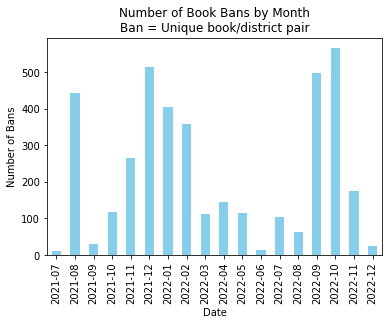

In [9]:
books = books.loc[books["Date of Challenge/Removal"] != "Fall 2022"]

# Convert to datetime obj
books['Date of Challenge/Removal'] = pd.to_datetime(books['Date of Challenge/Removal'], format='%b-%y')
books['month_year_column'] = books['Date of Challenge/Removal'].dt.to_period('M')


# Group by date and count occurrences
date_counts = books['month_year_column'].value_counts().sort_index()

# Plot the bar graph
date_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Book Bans by Month\nBan = Unique book/district pair')
plt.xlabel('Date')
plt.ylabel('Number of Bans')
plt.show()

In [13]:
books["State"] = books["State"].str.upper()

grouped = books.groupby(by="State")["Title"].count().reset_index()

<ipython-input-13-96867549cc1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books["State"] = books["State"].str.upper()


In [18]:
shapefile_path = "us_shapefiles/States_shapefile.shp"
gdf = gpd.read_file(shapefile_path)

merged = pd.merge(left=gdf, right=grouped, left_on="State_Name", right_on="State", how="left")
merged.fillna(0, inplace=True)

In [33]:
merged = merged[merged['State_Name'] != "ALASKA"]
merged = merged[merged['State_Name'] != "HAWAII"]

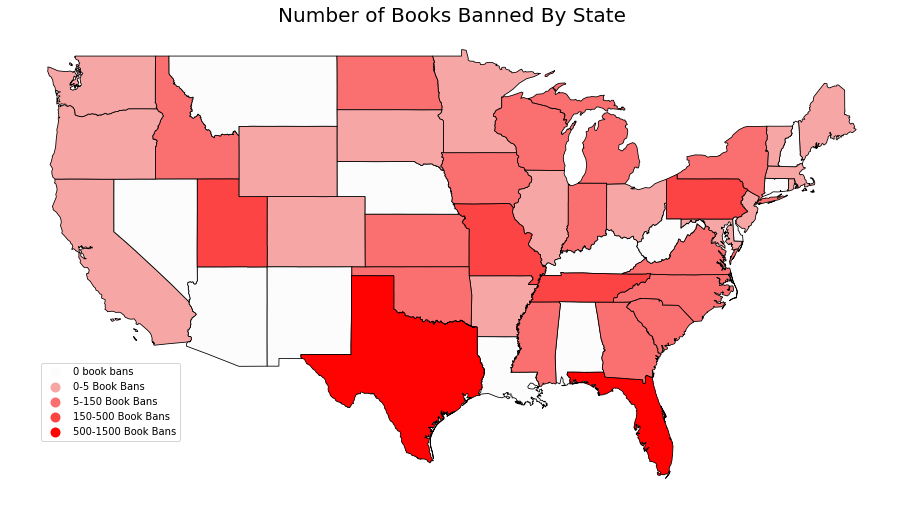

In [44]:
bins = [-1, 0, 5, 150, 500, 1500]  # Adjust the bin edges as needed
labels = ["0 book bans", '0-5 Book Bans', '5-150 Book Bans', '150-500 Book Bans', '500-1500 Book Bans']

# Create a new categorical column based on the bin edges and labels
merged['Category'] = pd.cut(merged['Title'], bins=bins, labels=labels, include_lowest=True)

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
divider = make_axes_locatable(ax)

# Define color map and normalization
custom_colors = ['#fcfcfc', '#f7a6a6', '#fa7070', '#fc4444', '#ff0303']  # Adjust colors as needed
# Create a ListedColormap using the custom colors
cmap = ListedColormap(custom_colors)
norm = Normalize(vmin=0, vmax=len(labels)-1)

# Plot the map
merged.plot(column='Category', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0', legend=True,)

# Add labels and title
ax.set_title('Number of Books Banned By State', fontdict={'fontsize': '20', 'fontweight' : '4'})
ax.set_axis_off()

# Adjust the legend position using the 'bbox_to_anchor' parameter
legend = ax.get_legend()
legend.set_bbox_to_anchor((0.2, 0.3))  # Adjust coordinates as needed

# Show the plot
plt.show()